In [1]:
import boto3
import pandas as pd
import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
def obtainVals(instancesList, product_descList, regionName):
    m4_list = []
    client = boto3.client('ec2', region_name = regionName)
    for i in range(1,90):
        response = client.describe_spot_price_history(
            InstanceTypes=instancesList,
            ProductDescriptions=product_descList,
            StartTime=datetime.datetime.now() - datetime.timedelta(i),
            EndTime=datetime.datetime.now() - datetime.timedelta(i-1),
            MaxResults=10000
        )
        response = response['SpotPriceHistory']
        
        for j in range(0,len(response)):
            m4_list.append(response[j])

    df = pd.DataFrame(m4_list)
    df = df.drop_duplicates()
    df.reset_index(drop=True,inplace=True)
    return df


In [3]:
df = obtainVals(['m4.2xlarge','g2.2xlarge','r3.2xlarge'],['Linux/UNIX (Amazon VPC)'], 'us-west-2')
df

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
0,us-west-2b,r3.2xlarge,Linux/UNIX,0.149800,2022-03-25 14:38:10+00:00
1,us-west-2c,m4.2xlarge,Linux/UNIX,0.281300,2022-03-25 13:56:25+00:00
2,us-west-2a,m4.2xlarge,Linux/UNIX,0.255300,2022-03-25 13:22:01+00:00
3,us-west-2b,m4.2xlarge,Linux/UNIX,0.231500,2022-03-25 10:22:53+00:00
4,us-west-2a,r3.2xlarge,Linux/UNIX,0.146400,2022-03-25 09:57:54+00:00
...,...,...,...,...,...
2300,us-west-2c,m4.2xlarge,Linux/UNIX,0.205700,2021-12-26 10:33:53+00:00
2301,us-west-2b,r3.2xlarge,Linux/UNIX,0.244600,2021-12-26 10:00:02+00:00
2302,us-west-2c,g2.2xlarge,Linux/UNIX,0.195000,2021-12-25 21:39:14+00:00
2303,us-west-2a,g2.2xlarge,Linux/UNIX,0.195000,2021-12-25 21:39:14+00:00


Text(0.5, 1.0, 'Instances in each type')

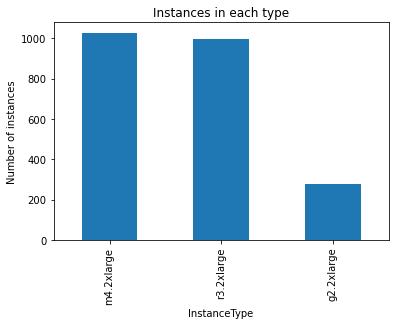

In [4]:
df.InstanceType.value_counts().plot(kind='bar')
plt.ylabel("Number of instances")
plt.xlabel("InstanceType")
plt.title("Instances in each type")

Text(0.5, 1.0, 'Instances in each zone')

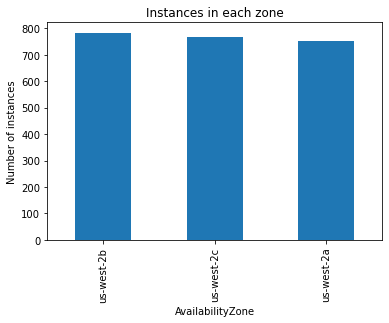

In [5]:
df.AvailabilityZone.value_counts().plot(kind='bar')
plt.ylabel("Number of instances")
plt.xlabel("AvailabilityZone")
plt.title("Instances in each zone")

In [6]:
us_wa = df.loc[df['AvailabilityZone'] == 'us-west-2a']
us_wa

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
2,us-west-2a,m4.2xlarge,Linux/UNIX,0.255300,2022-03-25 13:22:01+00:00
4,us-west-2a,r3.2xlarge,Linux/UNIX,0.146400,2022-03-25 09:57:54+00:00
8,us-west-2a,m4.2xlarge,Linux/UNIX,0.255000,2022-03-25 06:32:53+00:00
10,us-west-2a,g2.2xlarge,Linux/UNIX,0.195000,2022-03-25 06:12:59+00:00
13,us-west-2a,r3.2xlarge,Linux/UNIX,0.147000,2022-03-25 03:26:08+00:00
...,...,...,...,...,...
2290,us-west-2a,r3.2xlarge,Linux/UNIX,0.142700,2021-12-26 19:47:07+00:00
2294,us-west-2a,m4.2xlarge,Linux/UNIX,0.239400,2021-12-26 17:48:00+00:00
2296,us-west-2a,r3.2xlarge,Linux/UNIX,0.143200,2021-12-26 13:32:02+00:00
2299,us-west-2a,m4.2xlarge,Linux/UNIX,0.238800,2021-12-26 12:15:52+00:00


In [7]:
us_wb = df.loc[df['AvailabilityZone'] == 'us-west-2b']
us_wb 

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
0,us-west-2b,r3.2xlarge,Linux/UNIX,0.149800,2022-03-25 14:38:10+00:00
3,us-west-2b,m4.2xlarge,Linux/UNIX,0.231500,2022-03-25 10:22:53+00:00
5,us-west-2b,r3.2xlarge,Linux/UNIX,0.150600,2022-03-25 09:23:18+00:00
11,us-west-2b,g2.2xlarge,Linux/UNIX,0.195000,2022-03-25 06:12:59+00:00
12,us-west-2b,m4.2xlarge,Linux/UNIX,0.231800,2022-03-25 04:25:35+00:00
...,...,...,...,...,...
2291,us-west-2b,m4.2xlarge,Linux/UNIX,0.225700,2021-12-26 19:39:03+00:00
2295,us-west-2b,r3.2xlarge,Linux/UNIX,0.246000,2021-12-26 15:14:08+00:00
2297,us-west-2b,m4.2xlarge,Linux/UNIX,0.221700,2021-12-26 12:50:00+00:00
2301,us-west-2b,r3.2xlarge,Linux/UNIX,0.244600,2021-12-26 10:00:02+00:00


In [8]:
us_wc = df.loc[df['AvailabilityZone'] == 'us-west-2c']
us_wc

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
1,us-west-2c,m4.2xlarge,Linux/UNIX,0.281300,2022-03-25 13:56:25+00:00
6,us-west-2c,r3.2xlarge,Linux/UNIX,0.161300,2022-03-25 08:23:51+00:00
7,us-west-2c,m4.2xlarge,Linux/UNIX,0.280400,2022-03-25 07:49:25+00:00
9,us-west-2c,g2.2xlarge,Linux/UNIX,0.195000,2022-03-25 06:12:59+00:00
15,us-west-2c,r3.2xlarge,Linux/UNIX,0.161800,2022-03-25 01:35:07+00:00
...,...,...,...,...,...
2292,us-west-2c,r3.2xlarge,Linux/UNIX,0.177800,2021-12-26 18:38:23+00:00
2293,us-west-2c,m4.2xlarge,Linux/UNIX,0.204900,2021-12-26 17:56:06+00:00
2298,us-west-2c,r3.2xlarge,Linux/UNIX,0.178100,2021-12-26 12:42:07+00:00
2300,us-west-2c,m4.2xlarge,Linux/UNIX,0.205700,2021-12-26 10:33:53+00:00


In [9]:
us_wa_m4 = us_wa.loc[us_wa['InstanceType'] == 'm4.2xlarge']
us_wa_m4

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
2,us-west-2a,m4.2xlarge,Linux/UNIX,0.255300,2022-03-25 13:22:01+00:00
8,us-west-2a,m4.2xlarge,Linux/UNIX,0.255000,2022-03-25 06:32:53+00:00
16,us-west-2a,m4.2xlarge,Linux/UNIX,0.255700,2022-03-25 01:00:58+00:00
26,us-west-2a,m4.2xlarge,Linux/UNIX,0.256100,2022-03-24 12:46:09+00:00
35,us-west-2a,m4.2xlarge,Linux/UNIX,0.256600,2022-03-24 08:05:10+00:00
...,...,...,...,...,...
2265,us-west-2a,m4.2xlarge,Linux/UNIX,0.237700,2021-12-27 16:12:13+00:00
2271,us-west-2a,m4.2xlarge,Linux/UNIX,0.238600,2021-12-27 11:13:52+00:00
2284,us-west-2a,m4.2xlarge,Linux/UNIX,0.239800,2021-12-27 00:19:11+00:00
2294,us-west-2a,m4.2xlarge,Linux/UNIX,0.239400,2021-12-26 17:48:00+00:00


In [10]:
us_wb_m4 = us_wb.loc[us_wb['InstanceType'] == 'm4.2xlarge']
us_wb_m4

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
3,us-west-2b,m4.2xlarge,Linux/UNIX,0.231500,2022-03-25 10:22:53+00:00
12,us-west-2b,m4.2xlarge,Linux/UNIX,0.231800,2022-03-25 04:25:35+00:00
18,us-west-2b,m4.2xlarge,Linux/UNIX,0.232900,2022-03-24 21:24:37+00:00
23,us-west-2b,m4.2xlarge,Linux/UNIX,0.233800,2022-03-24 15:45:06+00:00
29,us-west-2b,m4.2xlarge,Linux/UNIX,0.233500,2022-03-24 10:04:18+00:00
...,...,...,...,...,...
2270,us-west-2b,m4.2xlarge,Linux/UNIX,0.228700,2021-12-27 11:39:17+00:00
2278,us-west-2b,m4.2xlarge,Linux/UNIX,0.229800,2021-12-27 06:50:15+00:00
2281,us-west-2b,m4.2xlarge,Linux/UNIX,0.229000,2021-12-27 02:01:07+00:00
2291,us-west-2b,m4.2xlarge,Linux/UNIX,0.225700,2021-12-26 19:39:03+00:00


In [11]:
us_wc_m4 = us_wc.loc[us_wc['InstanceType'] == 'm4.2xlarge']
us_wc_m4

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
1,us-west-2c,m4.2xlarge,Linux/UNIX,0.281300,2022-03-25 13:56:25+00:00
7,us-west-2c,m4.2xlarge,Linux/UNIX,0.280400,2022-03-25 07:49:25+00:00
17,us-west-2c,m4.2xlarge,Linux/UNIX,0.281100,2022-03-25 00:43:37+00:00
27,us-west-2c,m4.2xlarge,Linux/UNIX,0.281200,2022-03-24 10:55:07+00:00
41,us-west-2c,m4.2xlarge,Linux/UNIX,0.281000,2022-03-23 23:50:40+00:00
...,...,...,...,...,...
2268,us-west-2c,m4.2xlarge,Linux/UNIX,0.203000,2021-12-27 13:04:16+00:00
2277,us-west-2c,m4.2xlarge,Linux/UNIX,0.204600,2021-12-27 06:58:53+00:00
2283,us-west-2c,m4.2xlarge,Linux/UNIX,0.205000,2021-12-27 00:44:46+00:00
2293,us-west-2c,m4.2xlarge,Linux/UNIX,0.204900,2021-12-26 17:56:06+00:00


In [12]:
us_wa_m4.set_index('Timestamp',inplace=True)
us_wb_m4.set_index('Timestamp',inplace=True)
us_wc_m4.set_index('Timestamp',inplace=True)

for col in ['InstanceType', 'AvailabilityZone', 'ProductDescription']:
    us_wa_m4 = us_wa_m4.drop(col, axis=1)
    us_wb_m4 = us_wb_m4.drop(col, axis=1)
    us_wc_m4 = us_wc_m4.drop(col, axis=1)

us_wa_m4['SpotPrice'] = us_wa_m4['SpotPrice'].apply(pd.to_numeric)
us_wb_m4['SpotPrice'] = us_wb_m4['SpotPrice'].apply(pd.to_numeric)
us_wc_m4['SpotPrice'] = us_wc_m4['SpotPrice'].apply(pd.to_numeric)

us_wa_day = us_wa_m4.resample('D').mean()
us_wb_day = us_wb_m4.resample('D').mean()
us_wc_day = us_wc_m4.resample('D').mean()

us_wa_hour = us_wa_m4.resample('H').mean()
us_wb_hour = us_wb_m4.resample('H').mean()
us_wc_hour = us_wc_m4.resample('H').mean()

us_wb_hour

,SpotPrice
Timestamp,
2021-12-26 12:00:00+00:00,0.2217
2021-12-26 13:00:00+00:00,NaN
2021-12-26 14:00:00+00:00,NaN
2021-12-26 15:00:00+00:00,NaN
2021-12-26 16:00:00+00:00,NaN
...,...
2022-03-25 06:00:00+00:00,NaN
2022-03-25 07:00:00+00:00,NaN
2022-03-25 08:00:00+00:00,NaN


In [13]:
us_wa_hour.fillna(method='ffill',inplace=True)
us_wb_hour.fillna(method='ffill',inplace=True)
us_wb_hour.fillna(method='ffill',inplace=True)


Text(0.5, 1.0, 'Daily spot price per zone')

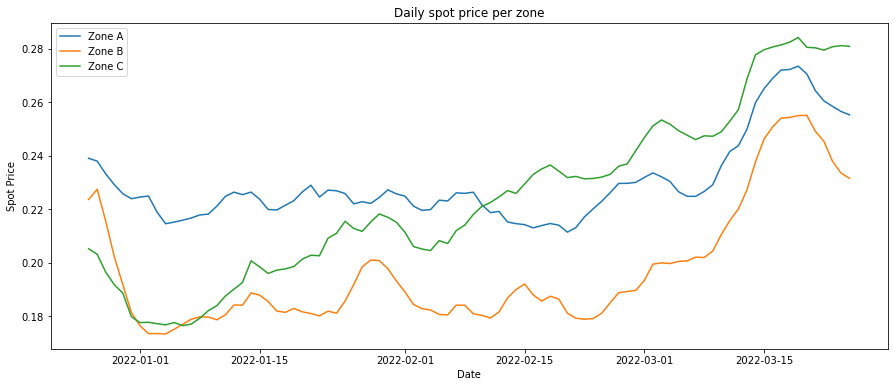

In [14]:
rcParams['figure.figsize'] = 15, 6

## plotting for the day frequency; remember we did not fill the values for day frequency
plt.plot(us_wa_day,label='Zone A')
plt.plot(us_wb_day,label='Zone B')
plt.plot(us_wc_day,label='Zone C')
plt.legend(loc='best')
plt.ylabel("Spot Price")
plt.xlabel("Date")
plt.title("Daily spot price per zone")

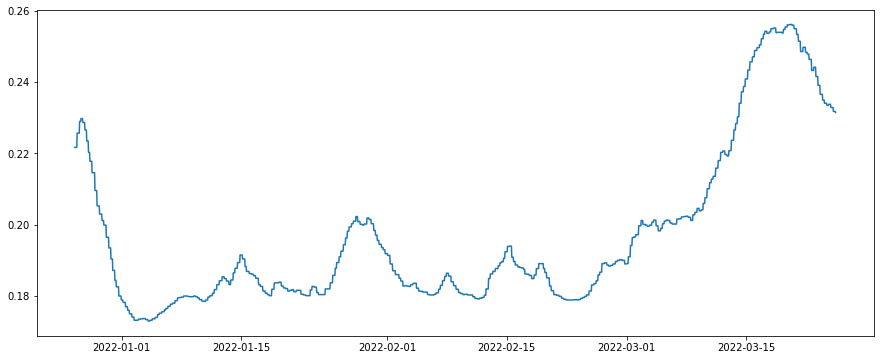

In [15]:
plt.plot(us_wb_hour)

Text(0.5, 1.0, 'Rolling Mean at Zone A')

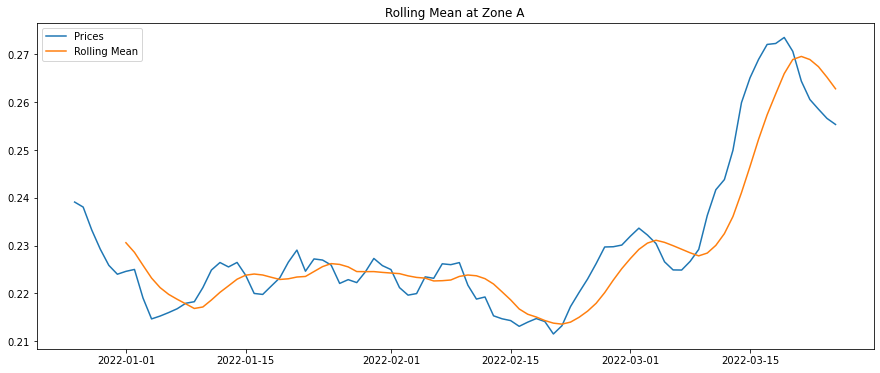

In [16]:
rolmean = us_wa_day.rolling(window = 7).mean()


## plot the results
orig = plt.plot(us_wa_day,label='Prices')
mean = plt.plot(rolmean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean at Zone A')

Text(0.5, 1.0, 'Rolling Mean at Zone B')

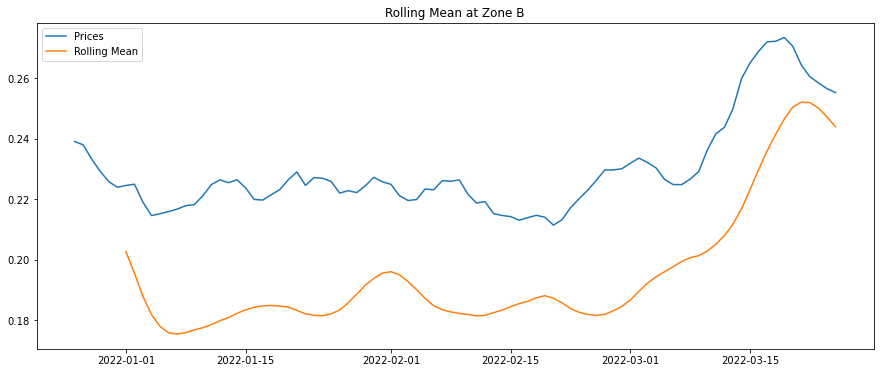

In [17]:
rolmean = us_wb_day.rolling(window = 7).mean()

## plot the results
orig = plt.plot(us_wa_day,label='Prices')
mean = plt.plot(rolmean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean at Zone B')

Text(0.5, 1.0, 'Rolling Mean at Zone C')

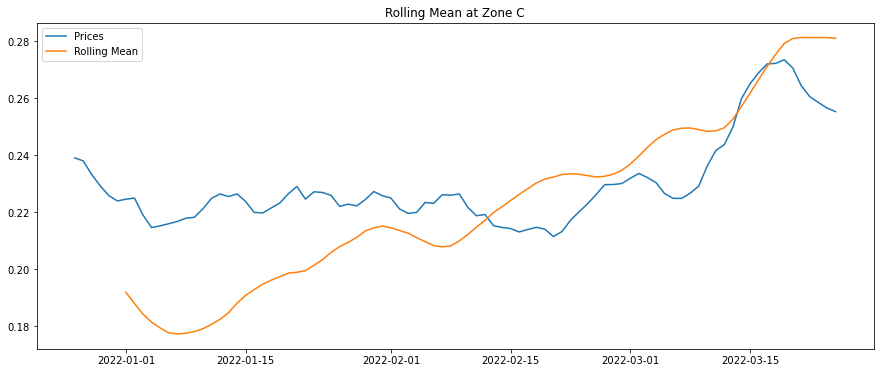

In [18]:
rolmean = us_wc_day.rolling(window = 7).mean()

## plot the results
orig = plt.plot(us_wa_day,label='Prices')
mean = plt.plot(rolmean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean at Zone C')

In [19]:
from statsmodels.tsa.stattools import adfuller

x = us_wa_day.SpotPrice
result = adfuller(x)

---------Important-----------------------
Utilise the REPL nature of the software for 
instantiating the following parameters for models 
use iteratively with the dfoutput function to create 
DH tests

In [20]:
x = us_wb_day.SpotPrice
result = adfuller(x)

In [21]:
x = us_wc_day.SpotPrice
result = adfuller(x)

In [22]:
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  0.454991
p-value                         0.983439
#Lags Used                      7.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

/home/trevinkm/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<function matplotlib.pyplot.show(close=None, block=None)>

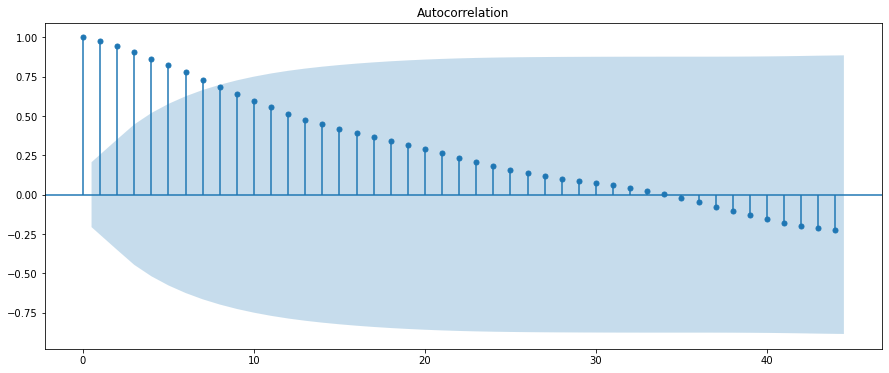

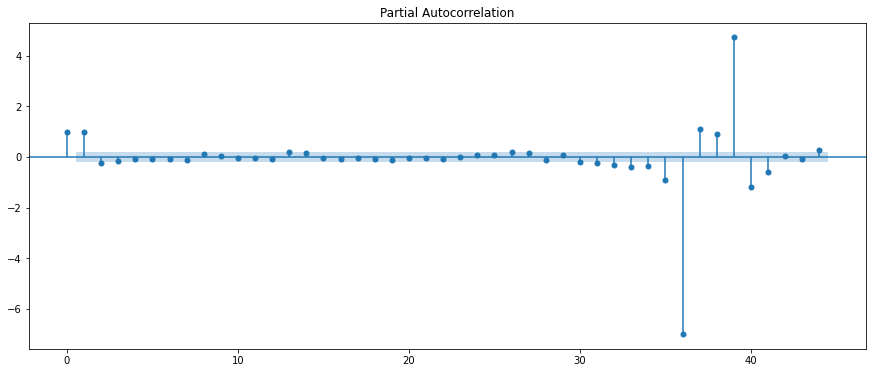

In [24]:
plot_acf(x,lags=44)
plt.show
plot_pacf(x,lags=44)
plt.show

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(x,order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49831D+00    |proj g|=  5.68798D+00

At iterate    5    f= -4.49899D+00    |proj g|=  1.23862D+00

At iterate   10    f= -4.49924D+00    |proj g|=  4.12950D-03

At iterate   15    f= -4.49925D+00    |proj g|=  1.89442D-01

At iterate   20    f= -4.49943D+00    |proj g|=  5.21470D-01

At iterate   25    f= -4.49950D+00    |proj g|=  2.99316D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     40      1     0     0   

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.SpotPrice   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 400.456
Method:                       css-mle   S.D. of innovations              0.003
Date:                Fri, 25 Mar 2022   AIC                           -792.911
Time:                        14:44:09   BIC                           -782.957
Sample:                    12-27-2021   HQIC                          -788.899
                         - 03-25-2022                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0008      0.001      1.185      0.236      -0.001       0.002
ar.L1.D.SpotPrice     0.6488      0.143      4.530      0.000       0.368       0.930
ma.L1.D.SpotPrice    -0.1889      0.176     -1.076      0.282      -0.533       0.155
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5412           +0.0000j            1.5412            0.0000
MA.1            5.2949           +0.0000j            5.2949            0.0000
-----------------------------------------------------------------------------
"""

/home/trevinkm/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


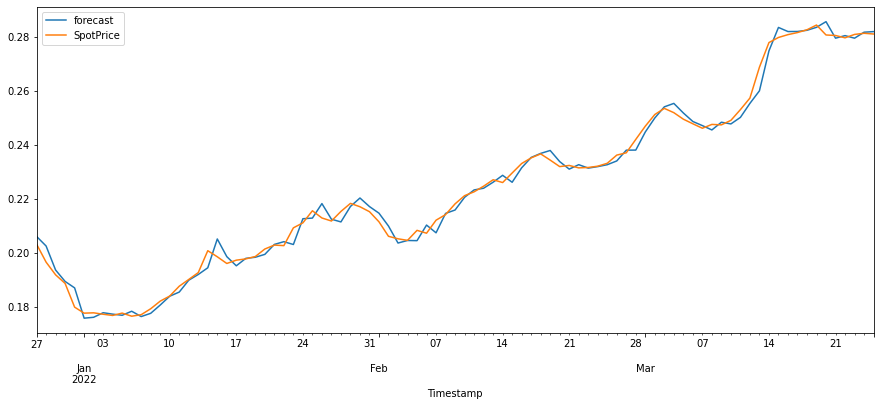

In [26]:
model_fit.plot_predict(dynamic=False)
plt.show()